In [2]:
%matplotlib notebook
# Calculation of a magnetic field of a wire
# later I want to to it three dimensional

import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from pylab import *


In [5]:
# constant
I = 10000000000
mu0 = 1e-7
constant = mu0/(4*np.pi)

# wire position
coord = [(10,10), (20,10), (20,20), (10,20), (10,25)]
coord2 = []

# devide path of the wire in parts of length one
parts = 0
for n in range(len(coord)-1):
    lengthx = coord[n+1][0] - coord[n][0]
    lengthy = coord[n+1][1] - coord[n][1]
    length = (lengthx**2 + lengthy**2)**.5
    for m in range(int(length)):
        coord2.append((coord[n][0]+lengthx/length*m, coord[n][1]+lengthy/length*m))
        parts += 1

# calculate the b-field
def bfield(x,y,z):
    b = 0
    for i in range(parts-1):
        dlx = coord2[i+1][0]-coord2[i][0]
        dly = coord2[i+1][1]-coord2[i][1] 
        dlz = 0
        dl = np.array([dlx,dly,dlz])
        rspace_minus_rwire_x = x - (coord2[i][0]+dlx)
        rspace_minus_rwire_y = y - (coord2[i][1]+dly)
        rspace_minus_rwire_z = z - 0
        rspace_minus_rwire = np.array([rspace_minus_rwire_x, rspace_minus_rwire_y, rspace_minus_rwire_z])
        absr = (rspace_minus_rwire_x**2 + rspace_minus_rwire_y**2 + rspace_minus_rwire_z**2)**0.5
        a = constant * I * np.cross(dl, rspace_minus_rwire) / absr**3
        b += (a[0]**2 + a[1]**2 + a[2]**2)**0.5
    return b

xwidth = 26
ywidth = 26
z = 1
bmatrix = np.zeros((xwidth,ywidth))
for x in range(xwidth):
    for y in range(ywidth):
        bmatrix[x][y] = bfield(x,y,z)

bmatrix[3][2]

5.2963662639344324

<IPython.core.display.Javascript object>


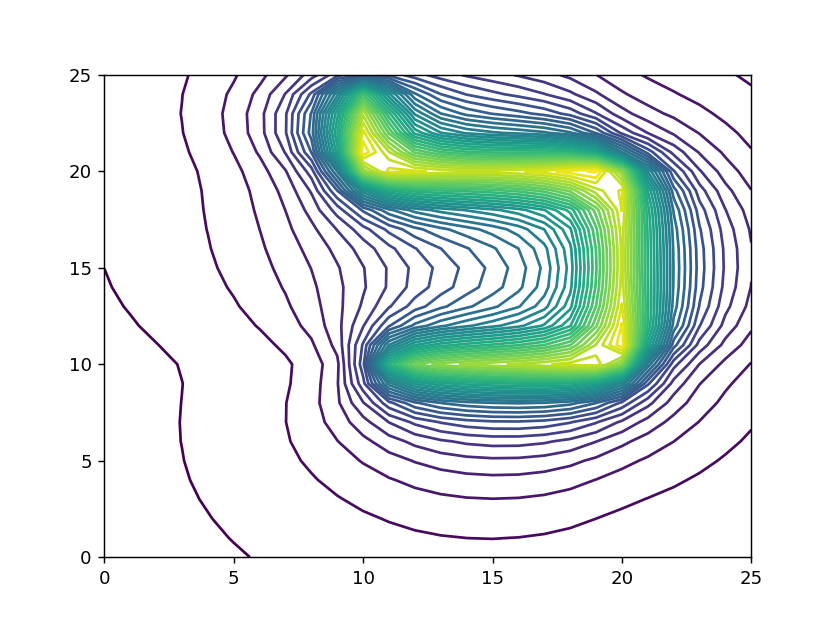

In [4]:
# visualize
plt.figure()
x = range(xwidth)
y = range(ywidth)
z = bmatrix[x][y].T
contour(x,y,z,35)
plt.show()